<a href="https://colab.research.google.com/github/meshalalsultan/GameStone_Classification/blob/main/Gemstone_Classification_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning - Image Clssification

In This notebook i will use one of very poupler topic in machine learning **Transfer Learning**



In Transfer Learning plan to :

I will start the expermint with only **2 class**

1. I'll use 10% From my orginal dataset witch will be 320 image for eatch class .
2. Choose 2 model from [Tensorflow](https://www.tensorflow.org/hub) hub that fit best for my problem .
3. I will Choose the best model matrics and use it with my `base_line` Model .
4. I will slightly tune the model with some tacnique , also i will give the model the data from 50% of the data = around 1600 image for eatch class.

## The Data 

3200 + Image of differnt labeld gemstones , The image are grouped into 87 classes witch are already divided into `train` and `test`.

All images in various sizes and in `jpeg` format.

The dataset is composed of two folders:

* `train` - This file contain 87 subfolder and ~2800 image in total.
* `test` - This file contain 87 subfolder and ~400 file in total. Eatch subfolder contains .jpeg of dieefent gemstones .



In [1]:
from google.colab import drive

drive.mount('/content/drive')
#/content/drive/MyDrive/tire_dataset.zip

Mounted at /content/drive


In [2]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/gemestone_2_class.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
ls Gemstones\ Data

test/  train/


In [4]:
ls Gemstones\ Data/train

Amazonite/  Amber/


In [5]:
ls Gemstones\ Data/train/Amber

amber_0.jpg   amber_16.jpg  amber_23.jpg  amber_30.jpg  amber_6.jpg
amber_10.jpg  amber_17.jpg  amber_24.jpg  amber_31.jpg  amber_7.jpg
amber_11.jpg  amber_19.jpg  amber_25.jpg  amber_32.jpg  amber_8.jpg
amber_12.jpg  amber_1.jpg   amber_26.jpg  amber_33.jpg
amber_13.jpg  amber_20.jpg  amber_27.jpg  amber_34.jpg
amber_14.jpg  amber_21.jpg  amber_29.jpg  amber_4.jpg
amber_15.jpg  amber_22.jpg  amber_2.jpg   amber_5.jpg


In [6]:
ls Gemstones\ Data/train/Amazonite

amazonite_0.jpg   amazonite_17.jpg  amazonite_25.jpg  amazonite_33.jpg
amazonite_10.jpg  amazonite_19.jpg  amazonite_26.jpg  amazonite_34.jpg
amazonite_11.jpg  amazonite_1.jpg   amazonite_27.jpg  amazonite_35.jpg
amazonite_12.jpg  amazonite_20.jpg  amazonite_29.jpg  amazonite_4.jpg
amazonite_13.jpg  amazonite_21.jpg  amazonite_2.jpg   amazonite_5.jpg
amazonite_14.jpg  amazonite_22.jpg  amazonite_30.jpg  amazonite_6.jpg
amazonite_15.jpg  amazonite_23.jpg  amazonite_31.jpg  amazonite_7.jpg
amazonite_16.jpg  amazonite_24.jpg  amazonite_32.jpg  amazonite_9.jpg


In [7]:
import os

# Walk through Gemstone directory and list number of files
for dirpath, dirnames, filenames in os.walk("Gemstones Data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'Gemstones Data'.
There are 2 directories and 0 images in 'Gemstones Data/train'.
There are 0 directories and 31 images in 'Gemstones Data/train/Amber'.
There are 0 directories and 32 images in 'Gemstones Data/train/Amazonite'.
There are 2 directories and 0 images in 'Gemstones Data/test'.
There are 0 directories and 4 images in 'Gemstones Data/test/Amber'.
There are 0 directories and 4 images in 'Gemstones Data/test/Amazonite'.


So For now i have 32 & 31 in the training for eatch class , and 4 for testing 

## How Many image in eatch class

In [8]:
num_amber_images_train = len(os.listdir("Gemstones Data/train/Amber"))

num_amber_images_train

31

In [9]:
num_amazonite_images_train = len(os.listdir('Gemstones Data/train/Amazonite'))

num_amazonite_images_train

32

## Get the class name

In [84]:
import pathlib
import numpy as np

data_dir = pathlib.Path('Gemstones Data/test') #turn the path to python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) #create list of class names
print(class_names)

['Amazonite' 'Amber']


## View the image function

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Setup target diroctory wich will view the image from
  target_folder = target_dir + target_class

  #Get random image path
  random_image = random.sample(os.listdir(target_folder),1)

  #read the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image Shape: \n {img.shape}')

  return img

Image Shape: 
 (450, 450, 3)


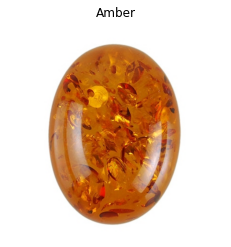

In [12]:
#View random image from training data
amber_img = view_random_image(target_dir='Gemstones Data/train/',
                        target_class='Amber')

Image Shape: 
 (401, 401, 3)


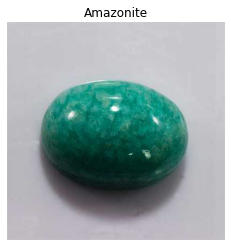

In [104]:
amazonite_img = view_random_image(target_dir='Gemstones Data/test/',
                        target_class='Amazonite')

# Preprossising 

Preprosess the image and generate more data

## Zoom , Scale , rotate ,flip , rescale

In [15]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

In [115]:
img_gen = ImageDataGenerator(rotation_range=30, #rotate the image by 30%
                             width_shift_range=0.1,#shift the image width by 10%
                             height_shift_range=0.1, #shift the image hight by 10%
                             rescale=1/255., #rescale image by normalize it
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip= True,
                             fill_mode='nearest')

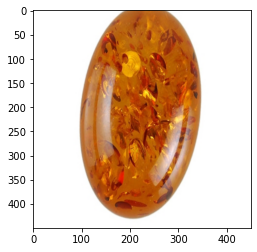

In [116]:
plt.imshow(img_gen.random_transform(amber_img));

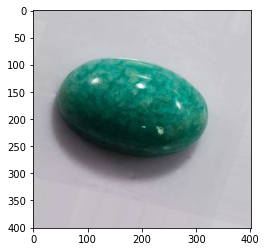

In [117]:
plt.imshow(img_gen.random_transform(amazonite_img));

# Setup the data input

Preparing the data 

In [141]:
IMAGE_SHAPE = (224,224,3)
BATCH_SIZE = 32

train_dir = 'Gemstones Data/train/'
test_dir = 'Gemstones Data/test/'

train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)
print('Training images:')
train_2_class_data = train_data_gen.flow_from_directory(train_dir,
                                                  target_size=IMAGE_SHAPE[:2],
                                                   batch_size=BATCH_SIZE,
                                                   class_mode = 'binary')



print('Testing Images:')
test_data = train_data_gen.flow_from_directory('Gemstones Data/test',
                                         target_size=IMAGE_SHAPE[:2],
                                         batch_size=BATCH_SIZE,
                                         class_mode='binary')


Training images:
Found 63 images belonging to 2 classes.
Testing Images:
Found 8 images belonging to 2 classes.


In [142]:
ls Gemstones\ Data/test/

Amazonite/  Amber/


In [125]:
test_data_gen.class_indices

{'Amazonite': 0, 'Amber': 1}

# Creating the model with tensorflow hub

In this expirmint i'm going to use two models from tensoflow 

[ResNetV2](https://arxiv.org/abs/1603.05027) - a state of the art computer vision model architecture from 2016.

[EfficientNet](https://arxiv.org/abs/1905.11946) - a state of the art computer vision architecture from 2019.

In [54]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [55]:
#Resnet50 V2

resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4'

#Efficentnet
efficinet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

# Create the model

In [132]:
def create_model(model_url ,num_classes=2):
  #Download the pretrined model and save it as keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name = 'feature_extraction_layer',
                                           input_shape=(224,224,3))
  
  #Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes , activation='sigmoid' , name='output_layer')
  ])

  return model

So , For now i will get the model and compile it with loss and optimization `Adam()`

In [133]:
len(test_data)

1

In [134]:
test_data

In [135]:
resnet_model = create_model(resnet_url,num_classes=train_2_class_data.num_classes)

# Compile
resnet_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [145]:
resnet_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 2)                 4098      
Total params: 23,568,898
Trainable params: 4,098
Non-trainable params: 23,564,800
_________________________________________________________________


In [144]:
resnet_history = resnet_model.fit(train_2_class_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_2_class_data),
                                  validation_data=test_data,
                                  validation_steps=(test_data))

Epoch 1/5


ValueError: ignored